<a href="https://colab.research.google.com/github/Dilavarj7/World_Bank_Education_Stats/blob/main/Dilavar_Singh_Team_7_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The World Bank EdStats All Indicator Query holds over 4,000 internationally comparable indicators that describe education access, progression, completion, literacy, teachers, population, and expenditures.The indicators cover the education cycle from pre-primary to vocational and tertiary education and also holds learning outcome data from international and regional learning assessments (e.g. PISA, TIMSS, PIRLS), equity data from household surveys, and projection/attainment data. </b>

## <b> Explore and analyze the data to identify variation of indicators across the globe, which countries are more alike and different. Feel free to add more extensive analyses and details.</b>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.patches as mpatches


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [126]:
path='/content/drive/My Drive/AlmaBetter/Cohort Aravali/Module 2/Week 1/Day 1/dat/'
EdStatsCountry_Series_df= pd.read_csv(path + 'EdStatsCountry-Series.csv')
EdStatsCountry_df= pd.read_csv(path + 'EdStatsCountry.csv')
EdStatsData_df= pd.read_csv(path + 'EdStatsData.csv')
EdStatsFootNote_df= pd.read_csv(path + 'EdStatsFootNote.csv')
EdStatsSeries_df= pd.read_csv(path + 'EdStatsSeries.csv')

In [127]:
#deleted unwanted columns
del EdStatsCountry_Series_df['Unnamed: 3']
del EdStatsCountry_df['Unnamed: 31']
del EdStatsData_df['Unnamed: 69']
del EdStatsFootNote_df['Unnamed: 4']
EdStatsSeries_df.drop(['Unit of measure','Notes from original source','Related source links','Other web links','Related indicators','License Type','Unnamed: 20'], axis=1, inplace=True)

In [128]:
EdStatsCountry_Series_df.head(5)

,CountryCode,SeriesCode,DESCRIPTION
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population...
1,ABW,SP.POP.GROW,Data sources: United Nations World Population ...
2,AFG,SP.POP.GROW,Data sources: United Nations World Population ...
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population...


In [116]:
EdStatsCountry_Series_df['DESCRIPTION'][4]

'Data sources : United Nations World Population Prospects'

In [ ]:
EdStatsCountry_Series_plot_graph_of_series_code=EdStatsCountry_Series_df['SeriesCode'].value_counts()
EdStatsCountry_Series_plot_graph_of_series_code

Text(0.5, 0, 'Series Code')

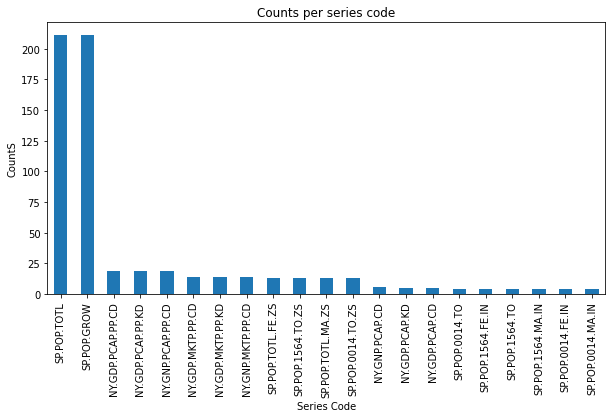

In [148]:
plt.rcParams['figure.figsize'] = (10, 5)
EdStatsCountry_Series_plot_graph_of_series_code.plot(kind='bar')

plt.title('Counts per series code')
plt.ylabel('CountS')
plt.xlabel('Series Code')

In [149]:
EdStatsCountry_df.head(1)

,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from offici...,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accou...,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN


In [150]:
Drop_na_from_country_df=EdStatsCountry_df.dropna(subset=['Region'])

In [151]:
EdStatsCountry_df['Region'].nunique()

7

In [153]:
value_count_for_region=EdStatsCountry_df['Region'].value_counts()
value_count_for_region

Europe & Central Asia         57
Sub-Saharan Africa            48
Latin America & Caribbean     41
East Asia & Pacific           36
Middle East & North Africa    21
South Asia                     8
North America                  3
Name: Region, dtype: int64

Text(0.5, 0, 'Region')

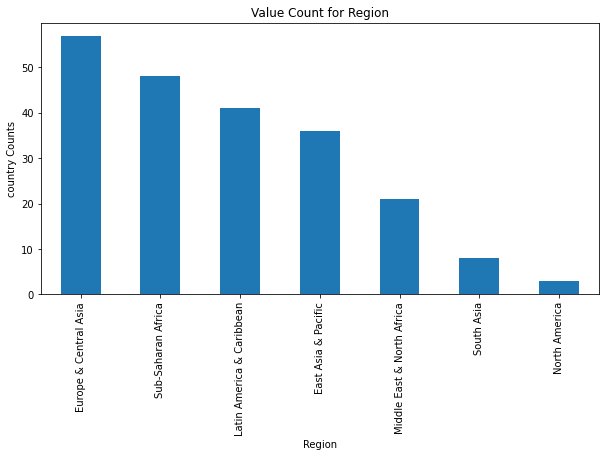

In [155]:
value_count_for_region.plot(kind='bar')

plt.title('Value Count for Region')
plt.ylabel('country Counts')
plt.xlabel('Region')

In [157]:
value_count_for_income_group=EdStatsCountry_df['Income Group'].value_counts()
value_count_for_income_group

Upper middle income     55
Lower middle income     50
High income: nonOECD    44
Low income              34
High income: OECD       31
Name: Income Group, dtype: int64

Text(0.5, 0, 'Income Group')

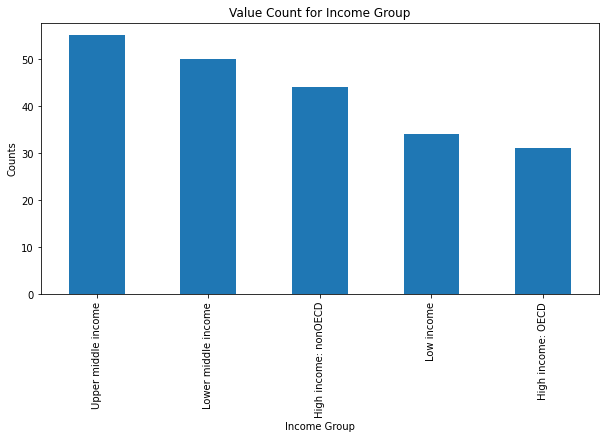

In [159]:
value_count_for_income_group.plot(kind='bar')

plt.title('Value Count for Income Group')
plt.ylabel('Counts')
plt.xlabel('Income Group')

In [168]:
EdStatsData_df.head(5)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.F,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.GPI,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Arab World,ARB,"Adjusted net enrolment rate, lower secondary, ...",UIS.NERA.2.M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.24514,86.101669,85.51194,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
EdStatsData_df.groupby('Country Name')['Indicator Name'].count()

Country Name
Afghanistan           3665
Albania               3665
Algeria               3665
American Samoa        3665
Andorra               3665
                      ... 
West Bank and Gaza    3665
World                 3665
Yemen, Rep.           3665
Zambia                3665
Zimbabwe              3665
Name: Indicator Name, Length: 242, dtype: int64

In [187]:
comapre_country_df=EdStatsData_df[(EdStatsData_df['Indicator Code']=='SE.PRM.TENR') & ((EdStatsData_df['Country Name'] =='India') | (EdStatsData_df['Country Name'] =='Arab World'))].reset_index()

In [189]:
del comapre_country_df['index']

In [190]:
comapre_country_df

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
0,Arab World,ARB,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.245140,86.101669,85.511940,85.320152,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,India,IND,"Adjusted net enrolment rate, primary, both sex...",SE.PRM.TENR,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,84.136543,84.063087,83.869987,88.703056,NaN,NaN,NaN,96.966560,96.987038,95.643608,96.192810,95.762993,96.984512,97.738869,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [194]:
column_lst=list(comapre_country_df.columns)

In [199]:
comapre_country_df1=comapre_country_df.groupby('Country Name')[[column_lst[i] for i in range(len(column_lst)) if i>1 ]].sum()

In [200]:
comapre_country_df1

,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100
Country Name,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Arab World,54.822121,54.894138,56.209438,57.267109,57.991138,59.36554,60.999962,61.92268,62.69342,64.383186,65.617767,66.085152,66.608139,67.290451,68.510094,69.033211,69.944908,71.04187,71.693779,71.699097,71.995819,72.602837,70.032722,70.464821,72.645683,71.81176,73.903511,74.425201,75.110817,76.254318,77.245682,78.800522,80.051399,80.805389,81.607063,82.489487,82.685509,83.280342,84.011871,84.195961,85.211998,85.245140,86.101669,85.511940,85.320152,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
India,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,84.136543,84.063087,83.869987,88.703056,0.000000,0.000000,0.000000,96.966560,96.987038,95.643608,96.192810,95.762993,96.984512,97.738869,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


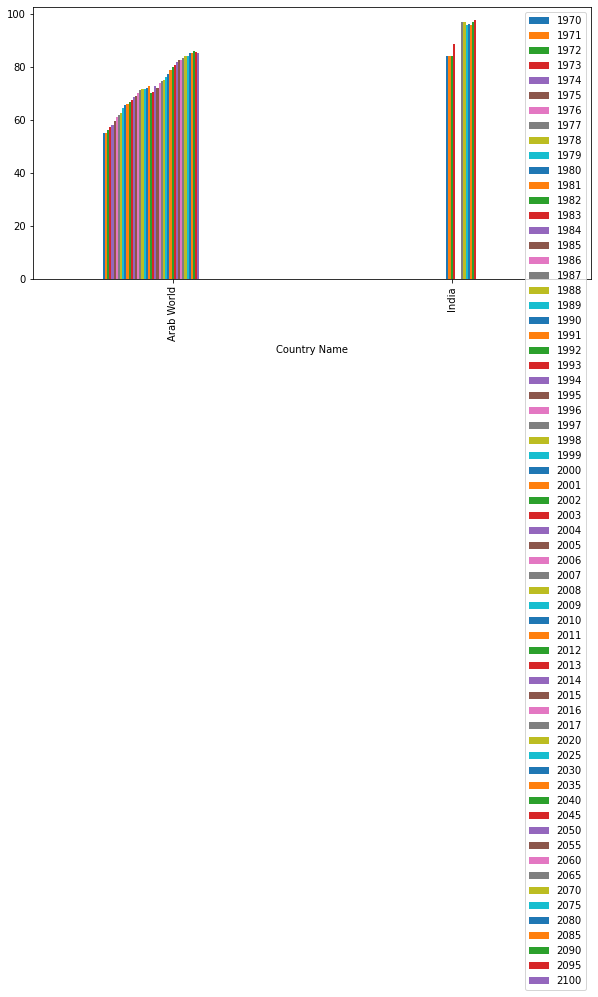

In [206]:
# Create the plot object
comapre_country_df1.plot(kind='bar')

#plt.title('Sales of Product in Every Month')
#plt.ylabel('No of Unit sold')
#plt.xlabel('Month Number')

In [165]:
country_lst_name=sorted(list(set(EdStatsData_df['Country Name'])))

In [ ]:
for country in country_lst_name:
  for country1 in country_lst_name:
    if country !=country1:
      result=comapare_indicator(country,country1)
      
return result   

In [ ]:
def comapare_indicator(country,country1):
  if

In [63]:
EdStatsSeries_df.head(1)

,Series Code,Topic,Indicator Name,Short definition,Long definition,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN


In [66]:
EdStatsSeries_df['Indicator Name'][1]

'Barro-Lee: Percentage of population age 15-19 with no education'

In [69]:
EdStatsSeries_df['Long definition'][1]

'Percentage of population age 15-19 with no education'

In [111]:
EdStatsFootNote_df[EdStatsFootNote_df['CountryCode']=='IND']

,CountryCode,SeriesCode,Year,DESCRIPTION
257058,IND,SE.SEC.ENRL.VO.FE.ZS,YR1990,UIS estimation
257059,IND,SE.PRE.ENRL,YR1992,Country estimation.
257060,IND,SE.SEC.ENRL.VO.FE,YR1998,Country estimation.
257061,IND,SE.SEC.ENRL.GC,YR2006,Country estimation.
257062,IND,SE.SEC.ENRL.VO.FE.ZS,YR1992,UIS estimation.
...,...,...,...,...
259670,IND,UIS.XUNIT.PPPCONST.56.FSGOV,YR2006,Country Data
259671,IND,UIS.XUNIT.PPPCONST.56.FSGOV,YR2009,Country Data
259672,IND,UIS.XUNIT.PPPCONST.56.FSGOV,YR2010,Country Data
259673,IND,UIS.XUNIT.PPPCONST.56.FSGOV,YR2011,Country Data


In [82]:
EdStatsSeries_df.head()

,Series Code,Topic,Indicator Name,Short definition,Long definition,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,General comments,Source,Statistical concept and methodology,Development relevance
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15-19 with...,Percentage of female population age 15-19 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 ...,Percentage of population age 15-19 with no edu...,Percentage of population age 15-19 with no edu...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 15+ with n...,Percentage of female population age 15+ with n...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ wi...,Percentage of population age 15+ with no educa...,Percentage of population age 15+ with no educa...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age...,Percentage of female population age 20-24 with...,Percentage of female population age 20-24 with...,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.b...,NaN,NaN


In [77]:
# Attainment series
att_ser,att_iname=zip(*EdStatsSeries_df[EdStatsSeries_df['Topic']=='Attainment'][['Series Code','Indicator Name']].values)

In [78]:
att_ser[:5]

('BAR.NOED.1519.FE.ZS',
 'BAR.NOED.1519.ZS',
 'BAR.NOED.15UP.FE.ZS',
 'BAR.NOED.15UP.ZS',
 'BAR.NOED.2024.FE.ZS')

In [79]:
att_iname[0:5]

('Barro-Lee: Percentage of female population age 15-19 with no education',
 'Barro-Lee: Percentage of population age 15-19 with no education',
 'Barro-Lee: Percentage of female population age 15+ with no education',
 'Barro-Lee: Percentage of population age 15+ with no education',
 'Barro-Lee: Percentage of female population age 20-24 with no education')

In [81]:
dict(zip(att_ser,att_iname))

{'BAR.NOED.1519.FE.ZS': 'Barro-Lee: Percentage of female population age 15-19 with no education',
 'BAR.NOED.1519.ZS': 'Barro-Lee: Percentage of population age 15-19 with no education',
 'BAR.NOED.15UP.FE.ZS': 'Barro-Lee: Percentage of female population age 15+ with no education',
 'BAR.NOED.15UP.ZS': 'Barro-Lee: Percentage of population age 15+ with no education',
 'BAR.NOED.2024.FE.ZS': 'Barro-Lee: Percentage of female population age 20-24 with no education',
 'BAR.NOED.2024.ZS': 'Barro-Lee: Percentage of population age 20-24 with no education',
 'BAR.NOED.2529.FE.ZS': 'Barro-Lee: Percentage of female population age 25-29 with no education',
 'BAR.NOED.2529.ZS': 'Barro-Lee: Percentage of population age 25-29 with no education',
 'BAR.NOED.25UP.FE.ZS': 'Barro-Lee: Percentage of female population age 25+ with no education',
 'BAR.NOED.25UP.ZS': 'Barro-Lee: Percentage of population age 25+ with no education',
 'BAR.NOED.3034.FE.ZS': 'Barro-Lee: Percentage of female population age 30-34 